**Parkison Disease using Neural Network**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
Pkns_data = pd.read_csv('/content/Parkinsson disease.csv')

In [ ]:
Pkns_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
Pkns_data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
Pkns_data.shape

(195, 24)

In [ ]:
Pkns_data.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
Pkns_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
#Analyse the target status

Pkns_data['status']

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [ ]:
Pkns_data['status'].unique()

array([1, 0])

In [ ]:
Pkns_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
print(Pkns_data.corr()['status'].abs().sort_values(ascending=False))

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64


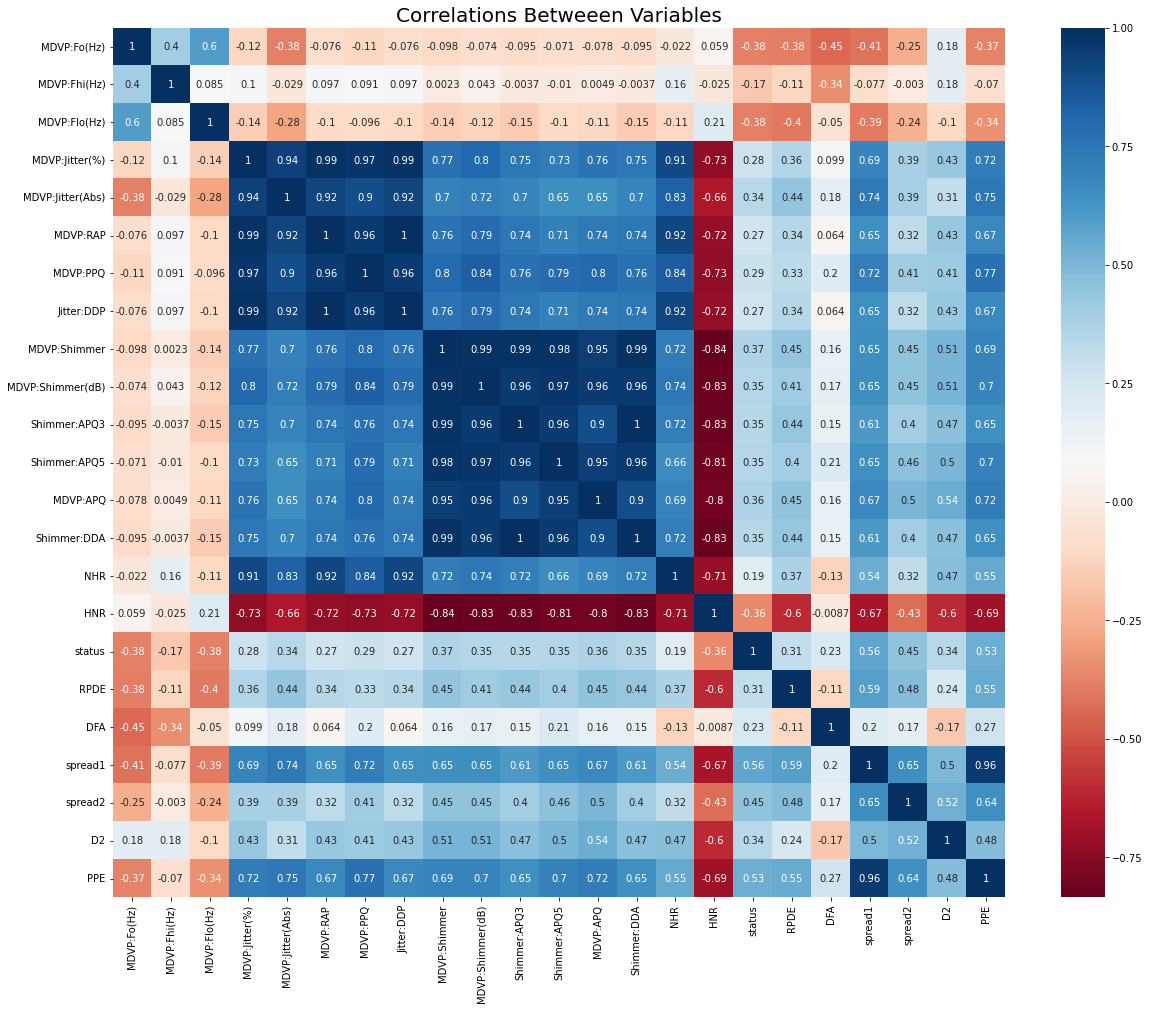

In [ ]:
# Heatmap 
plt.figure(figsize=(20,16))
sns.heatmap(Pkns_data.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

In [ ]:
# Get the features and labels
X = Pkns_data.loc[:,Pkns_data.columns!='status'].values[:,1:] #drops the name column because only values
y = Pkns_data.loc[:,'status'].values

In [ ]:
X.shape

(195, 22)

In [ ]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler

#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X)

print(f"Normlized Features its max : \n{X.max()} \n\nits min : \n{Pkns_data.min()}" )

Normlized Features its max : 
1.0000000000000002 

its min : 
name                phon_R01_S01_1
MDVP:Fo(Hz)                 88.333
MDVP:Fhi(Hz)               102.145
MDVP:Flo(Hz)                65.476
MDVP:Jitter(%)             0.00168
MDVP:Jitter(Abs)          0.000007
MDVP:RAP                   0.00068
MDVP:PPQ                   0.00092
Jitter:DDP                 0.00204
MDVP:Shimmer               0.00954
MDVP:Shimmer(dB)             0.085
Shimmer:APQ3               0.00455
Shimmer:APQ5                0.0057
MDVP:APQ                   0.00719
Shimmer:DDA                0.01364
NHR                        0.00065
HNR                          8.441
status                           0
RPDE                       0.25657
DFA                       0.574282
spread1                  -7.964984
spread2                   0.006274
D2                        1.423287
PPE                       0.044539
dtype: object


In [ ]:
# split train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

model = keras.Sequential([
    layers.Dense(256, input_shape=[22]),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3), 
    layers.Dense(256, activation='relu'),
    layers.Dropout(rate=0.3), 
    layers.Dense(78, activation='selu'),
    layers.Dropout(rate=0.3), 
    layers.Dense(5),
])

In [ ]:
# Add Optimizer, Loss, and Metric

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
# Train the model

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=49, #512 = 63%
    epochs=31   #200 = 63%
    #verbose=1.
    #callbacks=[early_stopping],
)

Epoch 1/31
3/3 [==============================] - 2s 126ms/step - loss: 7.8992 - binary_accuracy: 0.3923 - val_loss: 4.6854 - val_binary_accuracy: 0.3262
Epoch 2/31
3/3 [==============================] - 0s 20ms/step - loss: 6.4681 - binary_accuracy: 0.5154 - val_loss: 3.9578 - val_binary_accuracy: 0.4677
Epoch 3/31
3/3 [==============================] - 0s 18ms/step - loss: 5.2241 - binary_accuracy: 0.5938 - val_loss: 2.9021 - val_binary_accuracy: 0.4800
Epoch 4/31
3/3 [==============================] - 0s 20ms/step - loss: 5.0230 - binary_accuracy: 0.6231 - val_loss: 2.5203 - val_binary_accuracy: 0.5354
Epoch 5/31
3/3 [==============================] - 0s 18ms/step - loss: 4.6478 - binary_accuracy: 0.6415 - val_loss: 1.8955 - val_binary_accuracy: 0.5846
Epoch 6/31
3/3 [==============================] - 0s 19ms/step - loss: 4.0032 - binary_accuracy: 0.6892 - val_loss: 1.5946 - val_binary_accuracy: 0.6462
Epoch 7/31
3/3 [==============================] - 0s 19ms/step - loss: 3.3439 - b

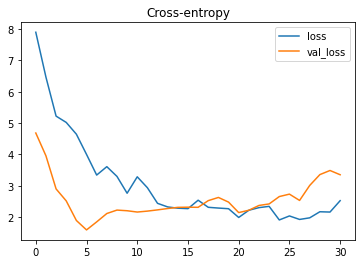

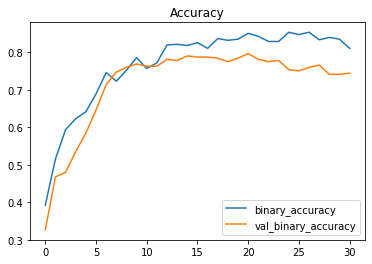

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
# Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
test_acc*100

3/3 [==============================] - 0s 4ms/step - loss: 3.3541 - binary_accuracy: 0.7446


74.46154356002808